In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
import seaborn as sns
import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
sns.set()

# Load User Data

In [2]:
#data = pd.read_csv('./telco.csv')
#data['Churn'] = pd.Categorical(data['Churn']).codes 
#non_numeric_columns = data.select_dtypes(include=['object']).columns.tolist()

data = pd.read_csv('./telco2-simple.csv')
data = data.drop(['State'], axis='columns')

non_numeric_columns = ['AreaCode', 'InternationalPlan', 'VoiceMailPlan']

data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

input = data.drop('Churn', axis='columns')
target = data['Churn']

input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=0.25)

data

,AccountLength,TotalDayMinutes,TotalEveMinutes,CustomerServiceCalls,Churn,AreaCode_415,AreaCode_510,InternationalPlan_yes,VoiceMailPlan_yes
0,141,258.6,222.0,0,False,1,0,1,1
1,65,129.1,228.5,4,True,1,0,0,0
2,74,187.7,163.4,0,False,1,0,0,0
3,168,128.8,104.9,1,False,0,0,0,0
4,95,156.6,247.6,3,False,0,1,0,0
5,62,120.7,307.2,4,False,1,0,0,0
6,161,332.9,317.8,4,True,1,0,0,0
7,85,196.4,280.9,1,False,0,0,0,1
8,93,190.7,218.2,3,False,0,1,0,0
9,76,189.7,212.8,1,False,0,1,0,1


# Train Classifier

In [3]:
#TODO add class_weights

#classifier = LinearSVC()
#classifier = SVC()
#classifier = KNeighborsClassifier()
classifier = DecisionTreeClassifier(max_depth=3) #min_samples_leaf=0.01, max_depth=3
#classifier = RandomForestClassifier(n_estimators=50) #oob_score=True, class_weight={0:1, 1:10000000}, n_estimators=50

classifier.fit(input_train, target_train)

target_predicted = classifier.predict(input_test)
print('Accuracy:', metrics.accuracy_score(target_test, target_predicted))
#print('Random Forest Accuracy:', classifier.oob_score_)

Accuracy: 0.9027777777777778


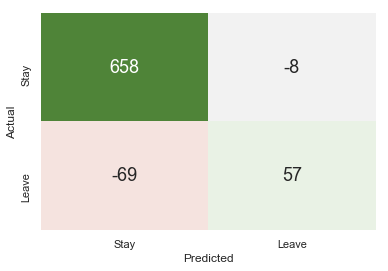

In [4]:
heat_map = metrics.confusion_matrix(target_test, target_predicted)

heat_map[0,1] *= -1
heat_map[1,0] *= -1

mpl.rcParams.update({'font.size': 18})
sns.heatmap(
    heat_map, 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=['Stay', 'Leave'],
    yticklabels=['Stay', 'Leave'],
    center=0,
    cmap=sns.diverging_palette(20, 120, n=100)
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

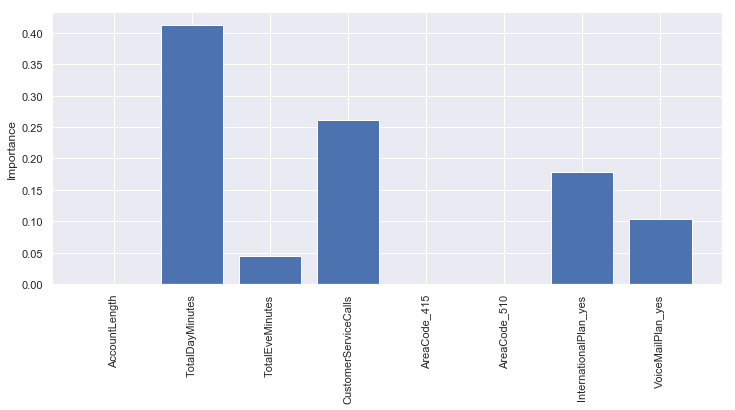

In [5]:
np.arange(5)

y_pos = range(len(input.columns))

plt.bar(y_pos, classifier.feature_importances_, align='center')
plt.xticks(y_pos, list(input), rotation='vertical')
plt.ylabel('Importance')

fig = plt.gcf()
fig.set_size_inches(12, 5)
 
plt.show()

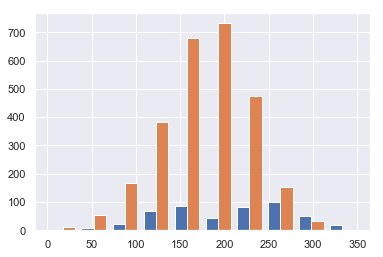

In [6]:
stayUsers = input[target == 0]
leaveUsers = input[target == 1]

histField = 'TotalDayMinutes'

histData = [
    list(leaveUsers[histField]),
    list(stayUsers[histField])
]

plt.hist(histData)
plt.show()



# Visualize Decision Tree

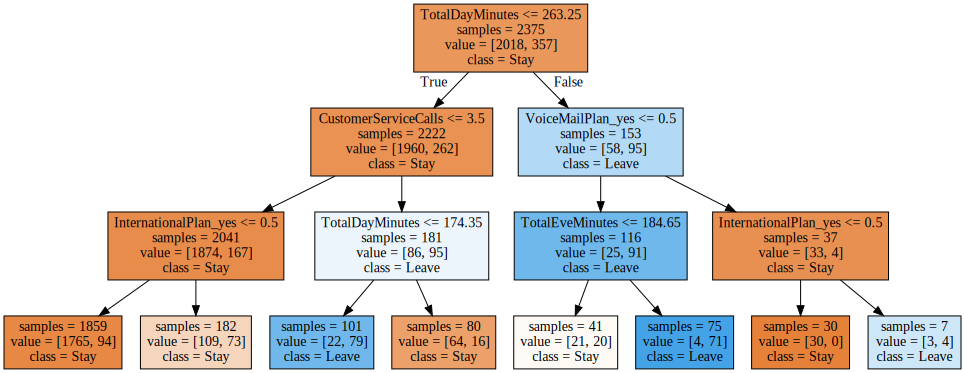

In [7]:
dot_data = tree.export_graphviz(classifier, 
    out_file=None, 
    feature_names=list(input),
    class_names=['Stay', 'Leave'],
    filled=True,
    impurity=False)

graphviz.Source(dot_data)